# <div dir='rtl'>تعریف کلاس ```FuzzyCMean```</div>


<div dir='rtl'>
     کلاس گفته شده توسط فاکتور هایی نظیر k و m و تعداد تکرار خوشه بندی تعریف میشود
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

class FuzzyCMean:
    def __init__(self, k=5, m=2, number_of_iterations=100, file_name='data1.csv'):
        self.file_name = file_name
        self.data = np.genfromtxt(self.file_name, delimiter=',')
        self.m = m
        self.k = k
        self.u = None
        self.centroids = None
        self.number_of_iterations = number_of_iterations
        self.error = float('inf')
        self.colors = ['r', 'y', 'g', 'c', 'b', 'm']

    def scatter_plot(self):
        """ a method to plot clusters in a scatter diagram (2D) """
        # set size for figure
        plt.figure(figsize=(8, 5))

        # plotting cluster elements
        for k in range(self.k):
            cluster = np.array([self.data[i] for i in range(len(self.data)) if k == np.argmax(self.u[i])])
            plt.scatter(cluster[:, 0], cluster[:, 1], alpha=0.7, c=self.colors[k], s=50)

        # plotting centroids
        for centroid in range(len(self.centroids)):
            plt.scatter(self.centroids[centroid][0], 
                        self.centroids[centroid][1], 
                        color=self.colors[centroid],
                        edgecolors='k', linewidths=2, s=100,
                        label='centroid #{}\n({}, {})'.format(centroid+1,
                                                              round(self.centroids[centroid][0], 2),
                                                              round(self.centroids[centroid][1], 2)))

        plt.title('k: {}, m: {}'.format(self.k, self.m))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def generate_initial_centroids(self):
        """ choosing k distinct data randomly as centroids """
        self.centroids = np.array([
            np.array([random.uniform(min(self.data[:, 0]), max(self.data[:, 1])) for d in range(self.data.shape[1])])
            for k in range(self.k)])

    def calculate_u(self):
        """ a method to determine how much data Xk is belonged to cluster Vi """
        self.u = np.array([[
                1 / np.sum(
                        [(np.linalg.norm(Xk - Vi) / np.linalg.norm(Xk - Vj)) ** (2 / (self.m - 1))for Vj in self.centroids])
                    for Vi in self.centroids]
                for Xk in self.data
            ])

    def update_centroids(self):
        """ updating centroids using data in the clusters """
        self.centroids = np.array([
                np.add.reduce([
                    (self.u[d, c] ** self.m) * self.data[d] for d in range(len(self.data))])
                / np.sum([sample[c] ** self.m for sample in self.u]) for c in range(len(self.centroids))])

    def calculate_errors(self):
        """ calculating error for the whole model """
        self.error = np.sum([
                np.sum([(self.u[j, i] ** self.m) * (np.linalg.norm(self.data[j] - self.centroids[i]) ** 2)
                        for i in range(len(self.centroids))]) for j in range(len(self.data))])

    def clustering(self):
        self.generate_initial_centroids()
        desc = 'dataset = {}, m = {}, k = {}'.format(self.file_name, self.m, self.k)
        for i in tqdm(range(self.number_of_iterations), desc=desc):  
            self.calculate_u()
            self.update_centroids()
            self.calculate_errors()

# <div dir='rtl'>رسم نمودار cost برای هر ۴ مجموعه داده</div>

<div dir='rtl'>
    به ازای k های مختلف، برای هر یک از مجموعه های داده، نمودار cost را رسم میکنیم.</div>

dataset = data1.csv, m = 2, k = 6: 100%|█████████████████████████████████████████████| 100/100 [00:33<00:00,  3.02it/s]


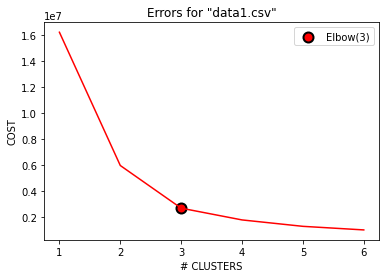

dataset = data2.csv, m = 2, k = 6: 100%|█████████████████████████████████████████████| 100/100 [01:28<00:00,  1.13it/s]


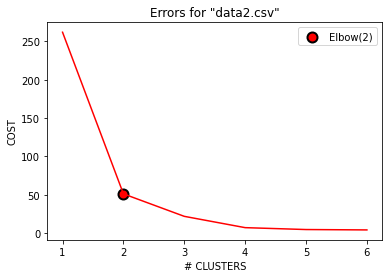

dataset = data3.csv, m = 2, k = 6: 100%|█████████████████████████████████████████████| 100/100 [00:50<00:00,  1.99it/s]


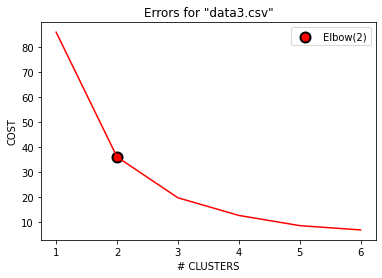

dataset = data4.csv, m = 2, k = 6: 100%|█████████████████████████████████████████████| 100/100 [00:30<00:00,  3.27it/s]


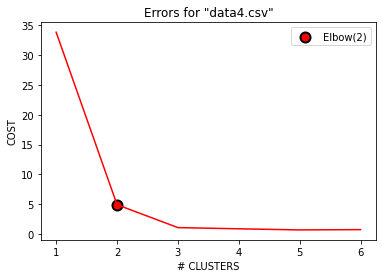

In [11]:
k_range = 6
elbow = [3, 2, 2, 2]
for i in range(4):
    errors = []
    for k in range(1, k_range+1):
        model = FuzzyCMean(k=k, file_name='data{}.csv'.format(i+1))
        model.clustering()
        errors.append(model.error)
        if k == elbow[i]:
            plt.scatter(elbow[i], model.error, c='r', edgecolors='k', linewidths=2, s=100, label='Elbow({})'.format(elbow[i]))

    plt.plot(np.arange(1, k_range+1), errors, color='r')
    plt.title('Errors for \"data{}.csv\"'.format(i+1))
    plt.xlabel('# CLUSTERS')
    plt.ylabel('COST')
    plt.legend()
    plt.show()


---
## <div dir='rtl'>رسم هزینه برای مجموعه داده اول به ازای m های مختلف</div>

<div dir='rtl'>
     برای m های از ۲ تا ۱۰ با k با مقدار ثابت ۳ خواهیم داشت:
</div>

dataset = data1.csv, m = 10, k = 2: 100%|████████████████████████████████████████████| 100/100 [00:05<00:00, 17.37it/s]


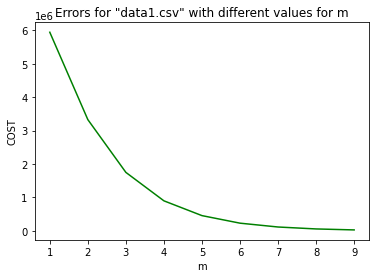

In [25]:
M = 10
errors_for_m = []
for m in range(1, M):
    model = FuzzyCMean(k=2, file_name='data1.csv', m=m+1)
    model.clustering()
    errors_for_m.append(model.error)
    
plt.plot(np.arange(1, M), errors_for_m, color='g')
plt.title('Errors for \"data{}.csv\" with different values for m'.format(1))
plt.xlabel('m')
plt.ylabel('COST')
plt.show()

<div dir='rtl'>
     مشاهده میشود با افزایش m هزینه کاهش میابد.
</div>

---

# <div dir='rtl'>رسم نمودار scatter</div>

<div dir='rtl'>
    قصد داریم نمودار پراکندگی برای مجموعه داده های دو بعدی را رسم کنیم.
</div>

## <div dir='rtl'>مجموعه داده‌ی ```data1.csv```</div>

<div dir='rtl'>
     برای data1.csv داده ها به صورت زیر میباشند:
</div>

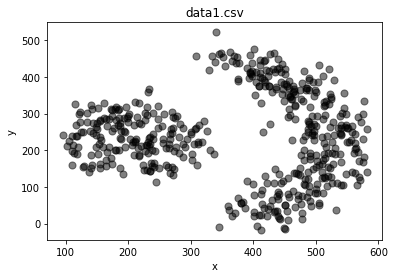

In [23]:
data1 = np.genfromtxt('data1.csv', delimiter=',')
plt.scatter(data1[:, 0], data1[:, 1], c='k', s=50, alpha=0.5)
plt.title('data1.csv')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dataset = data1.csv, m = 2, k = 1: 100%|█████████████████████████████████████████████| 100/100 [00:02<00:00, 49.98it/s]


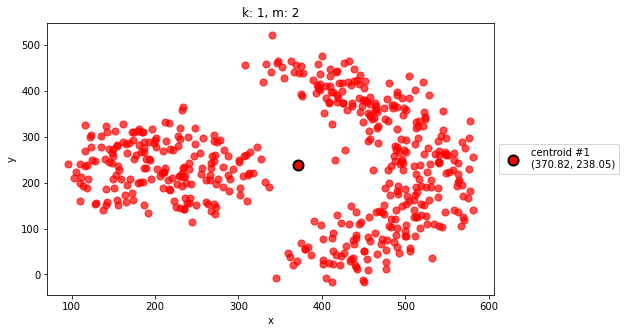

dataset = data1.csv, m = 2, k = 2: 100%|█████████████████████████████████████████████| 100/100 [00:04<00:00, 21.85it/s]


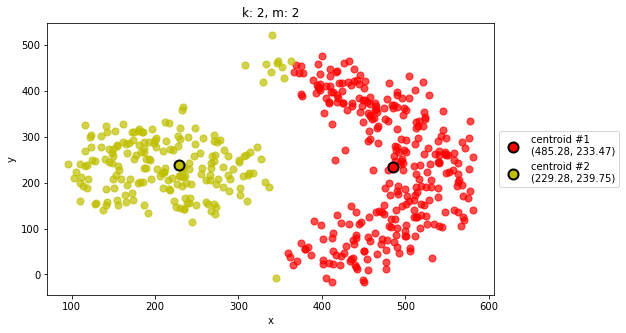

dataset = data1.csv, m = 2, k = 3: 100%|█████████████████████████████████████████████| 100/100 [00:08<00:00, 12.07it/s]


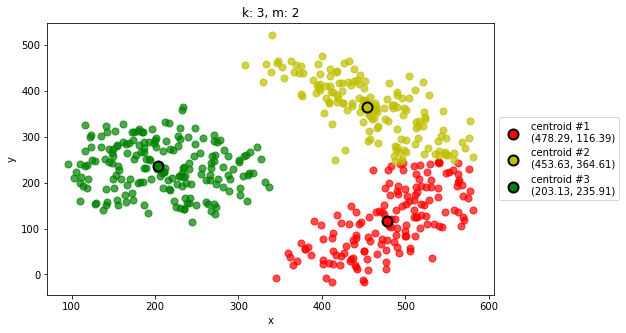

dataset = data1.csv, m = 2, k = 4: 100%|█████████████████████████████████████████████| 100/100 [00:18<00:00,  5.55it/s]


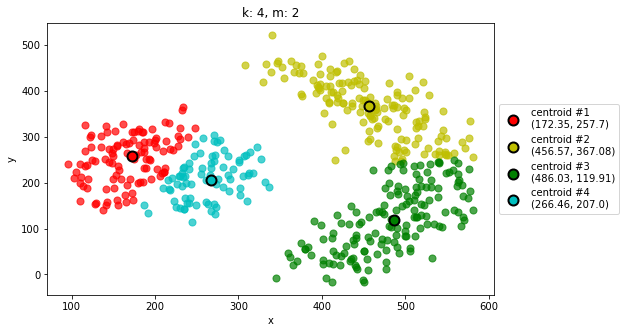

dataset = data1.csv, m = 2, k = 5: 100%|█████████████████████████████████████████████| 100/100 [00:25<00:00,  3.93it/s]


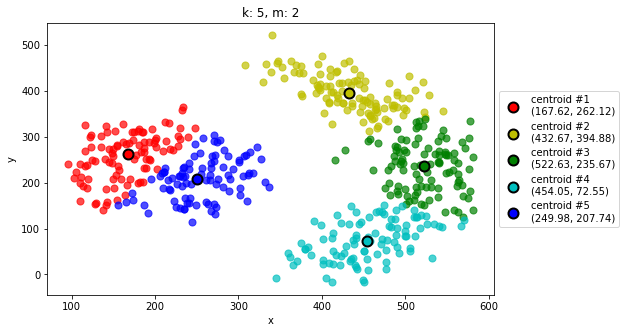

In [24]:
for i in range(1, 6):
    f1 = FuzzyCMean(k=i, file_name='data1.csv')
    f1.clustering()
    f1.scatter_plot()


## <div dir='rtl'>مجموعه داده‌ی ```data3.csv```</div>

<div dir='rtl'>
     برای data3.csv داده ها به صورت زیر میباشند:
</div>

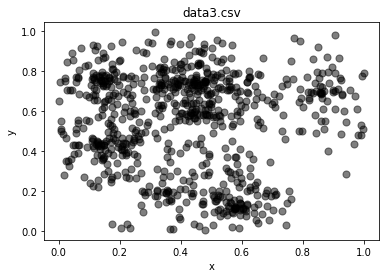

In [21]:
data3 = np.genfromtxt('data3.csv', delimiter=',')
plt.scatter(data3[:, 0], data3[:, 1], c='k', s=50, alpha=0.5)
plt.title('data3.csv')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dataset = data3.csv, m = 2, k = 1: 100%|█████████████████████████████████████████████| 100/100 [00:03<00:00, 32.16it/s]


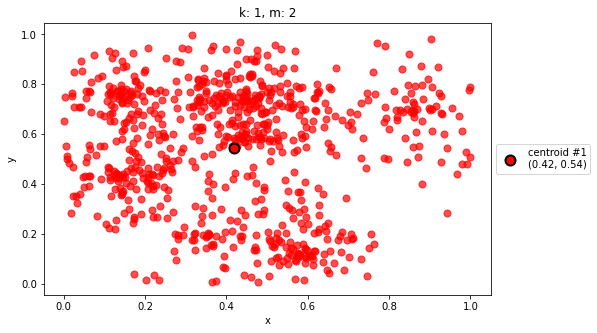

dataset = data3.csv, m = 2, k = 2: 100%|█████████████████████████████████████████████| 100/100 [00:07<00:00, 13.90it/s]


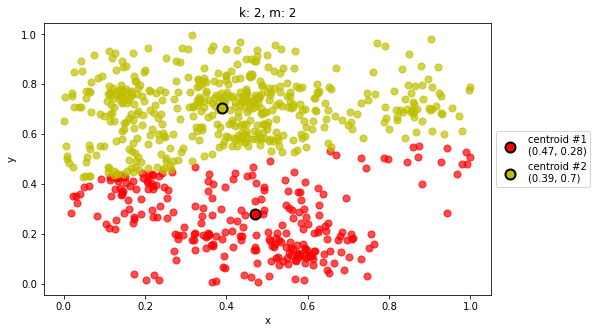

dataset = data3.csv, m = 2, k = 3: 100%|█████████████████████████████████████████████| 100/100 [00:14<00:00,  7.11it/s]


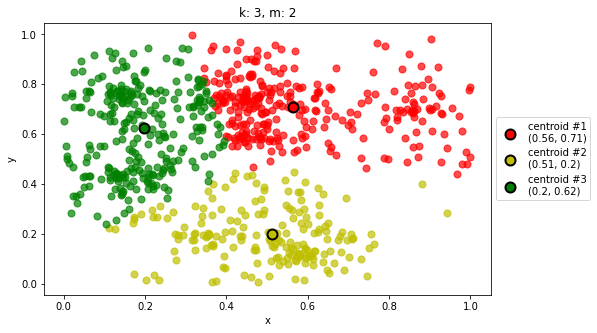

dataset = data3.csv, m = 2, k = 4: 100%|█████████████████████████████████████████████| 100/100 [00:26<00:00,  3.84it/s]


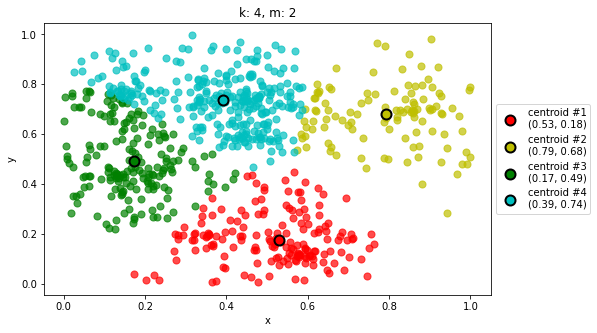

dataset = data3.csv, m = 2, k = 5: 100%|█████████████████████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]


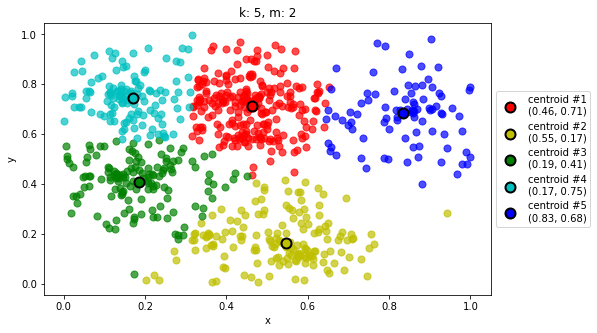

In [22]:
for i in range(1, 6):
    f1 = FuzzyCMean(k=i, file_name='data3.csv')
    f1.clustering()
    f1.scatter_plot()

## <div dir='rtl'>مجموعه داده‌ی ```data4.csv```</div>

<div dir='rtl'>
     برای data4.csv از نمودار scatter سه بعدی استفاده میکنیم:
</div>

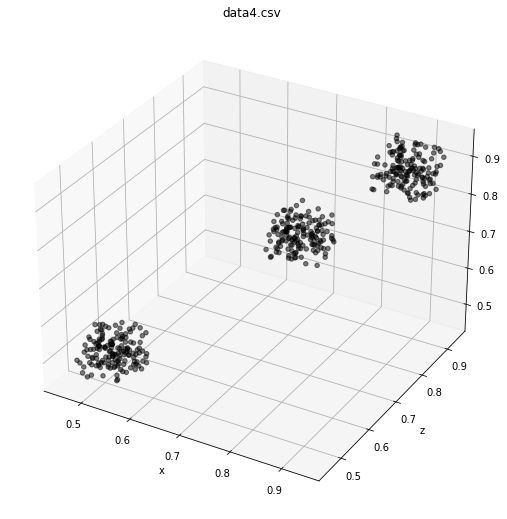

In [17]:
from mpl_toolkits import mplot3d

data4 = np.genfromtxt('data4.csv', delimiter=',')
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(data4[:, 0], data4[:, 1], data4[:, 2], c='k', alpha=0.5)
plt.title('data4.csv')
plt.xlabel('x')
plt.ylabel('y')
plt.ylabel('z')
plt.show()

dataset = data4.csv, m = 2, k = 1: 100%|█████████████████████████████████████████████| 100/100 [00:01<00:00, 54.95it/s]


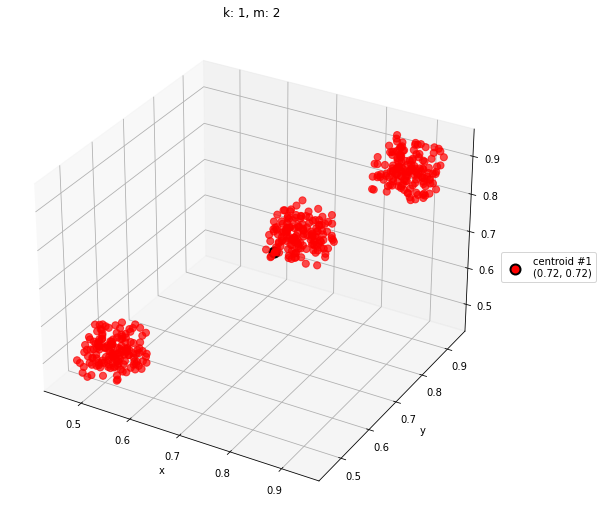

dataset = data4.csv, m = 2, k = 2: 100%|█████████████████████████████████████████████| 100/100 [00:04<00:00, 23.78it/s]


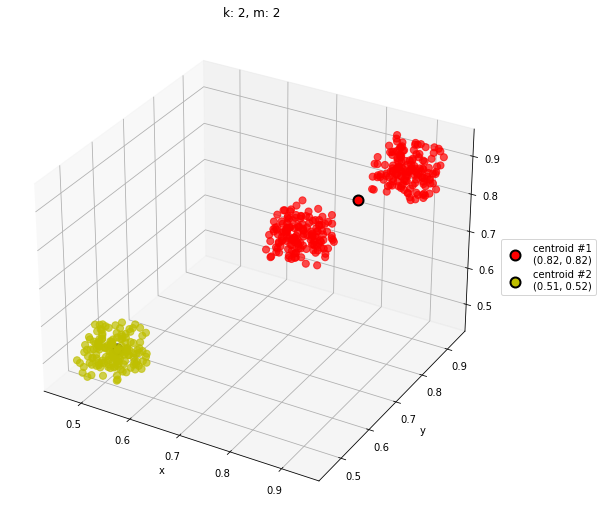

dataset = data4.csv, m = 2, k = 3: 100%|█████████████████████████████████████████████| 100/100 [00:07<00:00, 13.20it/s]


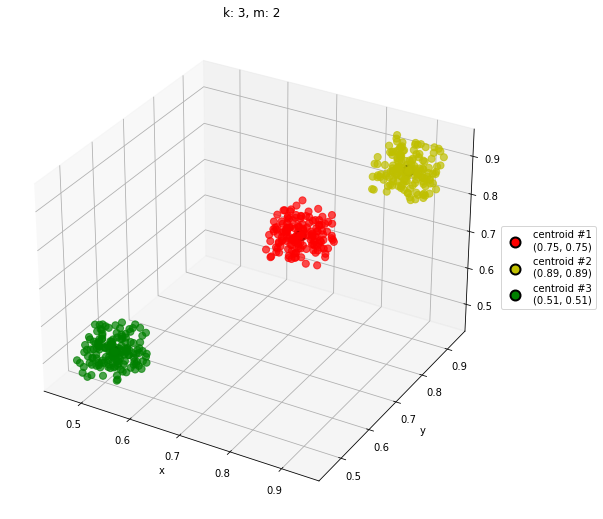

dataset = data4.csv, m = 2, k = 4: 100%|█████████████████████████████████████████████| 100/100 [00:16<00:00,  6.17it/s]


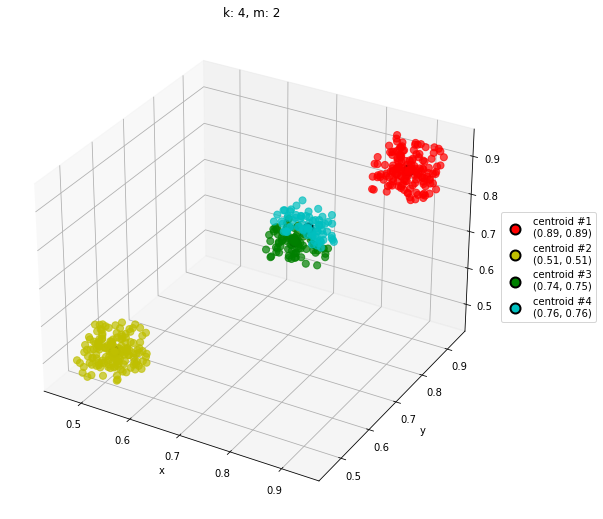

dataset = data4.csv, m = 2, k = 5: 100%|█████████████████████████████████████████████| 100/100 [00:22<00:00,  4.39it/s]


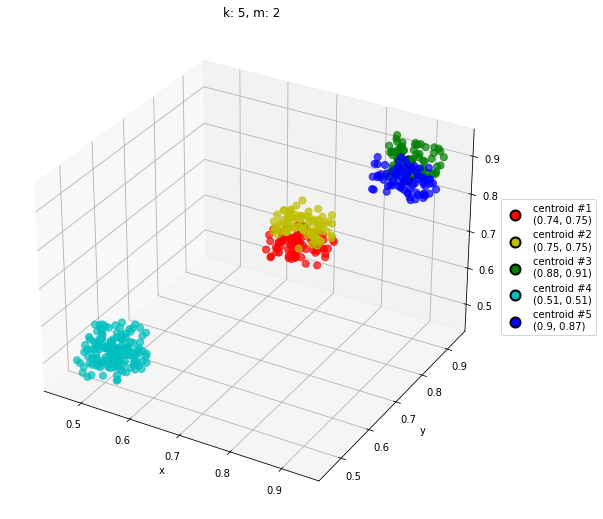

In [20]:
for i in range(1, 6):
    f4 = FuzzyCMean(k=i, file_name='data4.csv')
    f4.clustering()
    
    # set size for figure
    fig = plt.figure(figsize = (16, 9))
    ax = plt.axes(projection ="3d")

    # plotting cluster elements
    for k in range(f4.k):
        cluster = np.array([f4.data[i] for i in range(len(f4.data)) if k == np.argmax(f4.u[i])])
        ax.scatter3D(cluster[:, 0], cluster[:, 1], cluster[:, 2], alpha=0.7, c=f4.colors[k], s=50)

    # plotting centroids
    for centroid in range(len(f4.centroids)):
        ax.scatter3D(f4.centroids[centroid][0], 
                    f4.centroids[centroid][1], 
                    f4.centroids[centroid][2], 
                    color=f4.colors[centroid],
                    edgecolors='k', linewidths=2, s=100,
                    label='centroid #{}\n({}, {})'.format(centroid+1,
                                                          round(f4.centroids[centroid][0], 2),
                                                          round(f4.centroids[centroid][1], 2)))

    plt.title('k: {}, m: {}'.format(f4.k, f4.m))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()